# La démographie européenne de 2010 à aujourd’hui
# Projet ONPES - Licence 3 MIASHS spécialité Economie
# LEBRETON Louis - Université de Rennes I & II
# 29/12/2022

![image europe](https://www.gatestoneinstitute.org/pics/2700.jpg)


In [95]:
"""
Jeudi 29/12/2022
@author: llebreton

Analyse et visualisation des données démographiques des pays européens.

Fichiers de données utilisés :
-> "data_demography.csv" : données démographiques européennes issues de l'agrégation de donnée de la base de données Eurostat
-> "PIB_hab.csv" : données des PIB européens issues du scraping de la page web :
"https://en.wikipedia.org/wiki/Religion_in_Europe#cite_note-euroreligion2019-18"
-> "religiosity.csv" : données de la religiositié européenne issues du scraping de la page web :
"https://planificateur.a-contresens.net/europe/classement_par_pays/pib_par_habitant-EU.html"

Packages : 
"""
import os
import random
from PIL import Image # module pour importer des images
import IPython.display as ipd # module pour afficher des images & GIF

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy # module pour réaliser des calculs statistiques
import seaborn as sns
import folium # module pour réaliser des cartes leaflet
from wordcloud import WordCloud # module pour réaliser des wordclouds

plt.style.use('ggplot') # affichage des graphiques style 'ggplot'

# Choix du repertoire de travail
os.chdir('C:/Users/lebre/OneDrive/Bureau/PythonExpStats/Projet')

# Importation et nettoyage des données

Annee                                 0.00
Pays                                  0.00
ID_Pays                               0.00
naissance                             0.00
taux_naissance                        1.48
mortalite                             0.37
taux_mortalite                        1.67
variation_naturelle                   1.86
taux_solde_migratoire                 1.86
variation_demographique               1.30
taux_mariage                         17.25
taux_divorce                         20.41
indicateur_conjoncturel_fecondite    16.88
population                            9.09
dtype: float64
Liechtenstein             9
Iceland                   9
San Marino                8
Moldova, Republic of      8
Andorra                   6
Bosnia and Herzegovina    6
Albania                   5
Armenia                   4
Ireland                   4
Georgia                   3
Name: Pays, dtype: int64


<AxesSubplot:title={'center':'Valeurs manquantes pour la variable : Taux de divorce'}>

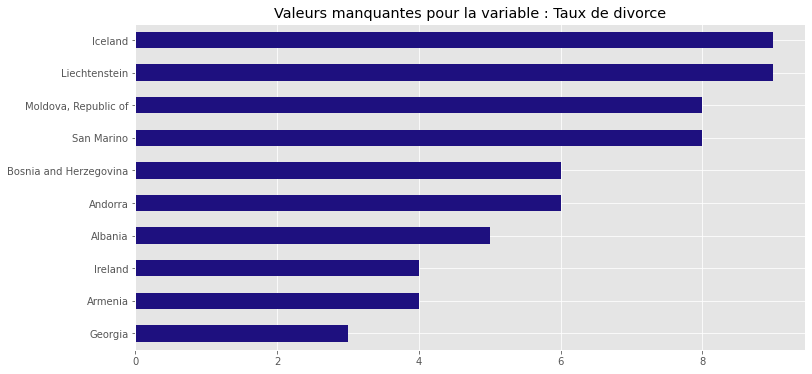

In [96]:
# importation des données
df = pd.read_csv("data_final/data_demography.csv")
dfr = pd.read_csv("data_final/religiosity.csv")
dfph = pd.read_csv("data_final/PIB_hab.csv")

# pourcentage de valeurs manquantes par variables du data frame data_demgraphy
print(100*df.isnull().sum()/len(df))

pays_null=df[df.taux_divorce.isnull()].Pays
print(pays_null.value_counts()[:10])

# barplot des principaux pays ayant des valeurs manquantes pour la variable : taux de divorce
pays_null.value_counts()[:10].sort_values().plot(kind = 'barh',title="Valeurs manquantes pour la variable : Taux de divorce",color="#1E107F")

Liechtenstein             9
San Marino                8
Moldova, Republic of      6
Bosnia and Herzegovina    6
Andorra                   4
Albania                   4
United Kingdom            4
Armenia                   3
Monaco                    3
Georgia                   3
Name: Pays, dtype: int64


<AxesSubplot:title={'center':'Valeurs manquantes pour la variable : Taux de mariage'}>

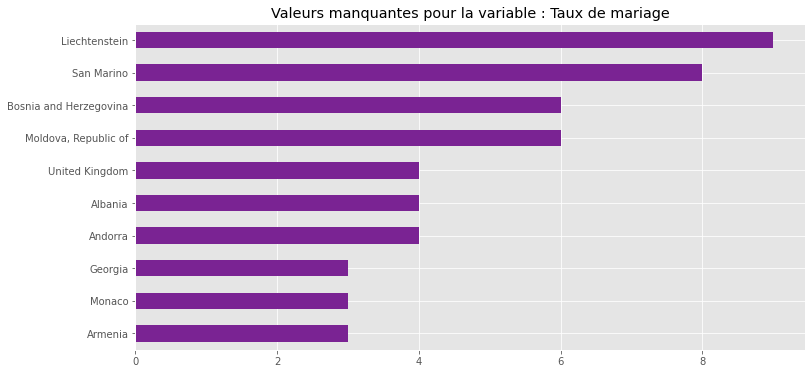

In [97]:
pays_null=df[df.taux_mariage.isnull()].Pays
print(pays_null.value_counts()[:10])

# barplot des principaux pays ayant des valeurs manquantes pour la variable : taux de mariage
pays_null.value_counts()[:10].sort_values().plot(kind = 'barh',title="Valeurs manquantes pour la variable : Taux de mariage",color="#7A2393")

San Marino                9
Moldova, Republic of      8
Bosnia and Herzegovina    8
Andorra                   5
Armenia                   5
Russian Federation        3
Monaco                    3
Georgia                   3
Azerbaijan                3
Ukraine                   3
Name: Pays, dtype: int64


<AxesSubplot:title={'center':'Valeurs manquantes pour la variable : Indicateur conjoncturel de fécondité'}>

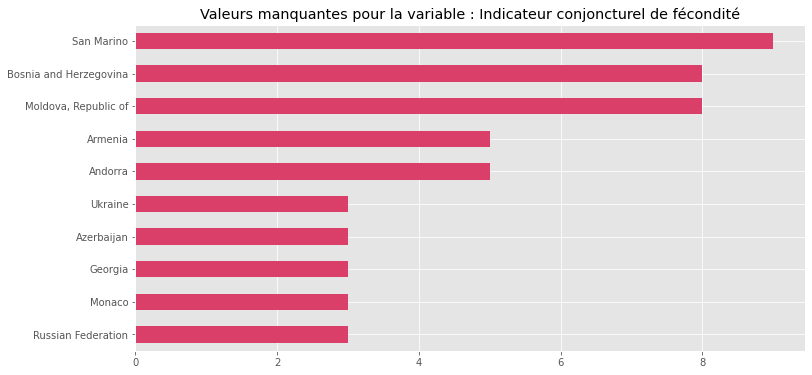

In [98]:
pays_null=df[df.indicateur_conjoncturel_fecondite.isnull()].Pays
print(pays_null.value_counts()[:10])

# barplot des principaux pays ayant des valeurs manquantes pour la variable : ICF
pays_null.value_counts()[:10].sort_values().plot(kind = 'barh',title="Valeurs manquantes pour la variable : Indicateur conjoncturel de fécondité",color="#DA3F6A")

In [99]:
# Donc suppression des lignes avec des valeurs NA
df.dropna(inplace=True)
print(100*df.isnull().sum()/len(df))

## Transformation du data frame data_demography

# création d'une nouvelle variable
df["var_naturelle"]=df["naissance"]-df["mortalite"]
#création d'un df seulement pour l'UE
df_ue=df.loc[df['Pays']=="UE"]
# suppression des lignes UE
df=df.loc[df['Pays']!="UE"]
# suppression des anomalies / valeurs aberrantes
df=df.loc[(df['taux_solde_migratoire']>=(-50))&(df['indicateur_conjoncturel_fecondite']>=(-50))]

Annee                                0.0
Pays                                 0.0
ID_Pays                              0.0
naissance                            0.0
taux_naissance                       0.0
mortalite                            0.0
taux_mortalite                       0.0
variation_naturelle                  0.0
taux_solde_migratoire                0.0
variation_demographique              0.0
taux_mariage                         0.0
taux_divorce                         0.0
indicateur_conjoncturel_fecondite    0.0
population                           0.0
dtype: float64


# Description, statistiques descriptives et affichage des données 

In [100]:
pd.set_option('precision', 2) # nombre de décimales affichées

# Description du data frame data_demography

print("HEAD : ------------------------------------------------")
display(df.head())
print("SHAPE : -----------------------------------------------")
print(df.shape) 
print("DTYPES : ----------------------------------------------")
print(df.dtypes) 
print("DESCRIBE : --------------------------------------------")
display(df.describe()) 
print("INFO : ------------------------------------------------")
print(df.info()) 
print("ISNULL : ----------------------------------------------")
display(df.isnull()) 
print(df.Pays.unique()) # Pays analysés


HEAD : ------------------------------------------------


Annee     Pays ID_Pays  naissance  taux_naissance  mortalite  \
10   2014  Albania      AL      35760            12.4    20656.0   
11   2015  Albania      AL      32715            11.4    22418.0   
12   2016  Albania      AL      31733            11.0    21388.0   
13   2017  Albania      AL      30869            10.7    22232.0   
14   2018  Albania      AL      28934            10.1    21804.0   

    taux_mortalite  variation_naturelle  taux_solde_migratoire  \
10             7.1                  5.2                   -7.5   
11             7.8                  3.6                   -7.1   
12             7.4                  3.6                   -3.2   
13             7.7                  3.0                   -5.2   
14             7.6                  2.5                   -5.2   

    variation_demographique  taux_mariage  taux_divorce  \
10                     -2.3           8.2           1.5   
11                     -3.5           8.7           1.3   
12                      0.3           7.8           1.9   
13                     -2.2           7.9           1.6   
14                     -2.8           8.1           1.7   

    indicateur_conjoncturel_fecondite  population  var_naturelle  
10                               1.73    2.89e+06        15104.0  
11                               1.59    2.89e+06        10297.0  
12                               1.54    2.88e+06        10345.0  
13                               1.48    2.88e+06         8637.0  
14                               1.37    2.87e+06         7130.0

SHAPE : -----------------------------------------------
(363, 15)
DTYPES : ----------------------------------------------
Annee                                  int64
Pays                                  object
ID_Pays                               object
naissance                              int64
taux_naissance                       float64
mortalite                            float64
taux_mortalite                       float64
variation_naturelle                  float64
taux_solde_migratoire                float64
variation_demographique              float64
taux_mariage                         float64
taux_divorce                         float64
indicateur_conjoncturel_fecondite    float64
population                           float64
var_naturelle                        float64
dtype: object
DESCRIBE : --------------------------------------------


Annee  naissance  taux_naissance  mortalite  taux_mortalite  \
count   363.00   3.63e+02          363.00     363.00          363.00   
mean   2015.42   1.80e+05           10.61  164255.08           10.18   
std       2.83   2.70e+05            1.91  219120.35            2.60   
min    2011.00   2.92e+02            6.80     224.00            4.90   
25%    2013.00   3.03e+04            9.45   28788.50            8.55   
50%    2015.00   6.76e+04           10.30   67088.00            9.80   
75%    2018.00   1.70e+05           11.20  137482.00           12.00   
max    2020.00   1.34e+06           18.80  985572.00           18.00   

       variation_naturelle  taux_solde_migratoire  variation_demographique  \
count               363.00                 363.00                   363.00   
mean                  0.43                   2.28                     2.71   
std                   3.88                   6.24                     7.92   
min                  -9.50                 -17.40                   -16.20   
25%                  -2.45                  -0.40                    -2.45   
50%                   0.50                   1.10                     1.60   
75%                   2.40                   4.40                     6.70   
max                  12.90                  40.40                    41.70   

       taux_mariage  taux_divorce  indicateur_conjoncturel_fecondite  \
count        363.00        363.00                             363.00   
mean           5.04          1.93                               1.58   
std            1.46          0.70                               0.21   
min            1.60          0.10                               1.13   
25%            3.90          1.50                               1.43   
50%            4.90          1.90                               1.54   
75%            5.90          2.40                               1.71   
max            9.20          4.10                               2.23   

       population  var_naturelle  
count    3.63e+02         363.00  
mean     1.67e+07       15719.95  
std      2.28e+07      154618.26  
min      3.34e+04     -335425.00  
25%      2.88e+06      -16838.00  
50%      7.22e+06        1057.00  
75%      1.41e+07       11278.00  
max      8.32e+07      947383.00

INFO : ------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 10 to 535
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Annee                              363 non-null    int64  
 1   Pays                               363 non-null    object 
 2   ID_Pays                            363 non-null    object 
 3   naissance                          363 non-null    int64  
 4   taux_naissance                     363 non-null    float64
 5   mortalite                          363 non-null    float64
 6   taux_mortalite                     363 non-null    float64
 7   variation_naturelle                363 non-null    float64
 8   taux_solde_migratoire              363 non-null    float64
 9   variation_demographique            363 non-null    float64
 10  taux_mariage                       363 non-null    float64
 11  t

Annee   Pays  ID_Pays  naissance  taux_naissance  mortalite  \
10   False  False    False      False           False      False   
11   False  False    False      False           False      False   
12   False  False    False      False           False      False   
13   False  False    False      False           False      False   
14   False  False    False      False           False      False   
..     ...    ...      ...        ...             ...        ...   
530  False  False    False      False           False      False   
532  False  False    False      False           False      False   
533  False  False    False      False           False      False   
534  False  False    False      False           False      False   
535  False  False    False      False           False      False   

     taux_mortalite  variation_naturelle  taux_solde_migratoire  \
10            False                False                  False   
11            False                False                  False   
12            False                False                  False   
13            False                False                  False   
14            False                False                  False   
..              ...                  ...                    ...   
530           False                False                  False   
532           False                False                  False   
533           False                False                  False   
534           False                False                  False   
535           False                False                  False   

     variation_demographique  taux_mariage  taux_divorce  \
10                     False         False         False   
11                     False         False         False   
12                     False         False         False   
13                     False         False         False   
14                     False         False         False   
..                       ...           ...           ...   
530                    False         False         False   
532                    False         False         False   
533                    False         False         False   
534                    False         False         False   
535                    False         False         False   

     indicateur_conjoncturel_fecondite  population  var_naturelle  
10                               False       False          False  
11                               False       False          False  
12                               False       False          False  
13                               False       False          False  
14                               False       False          False  
..                                 ...         ...            ...  
530                              False       False          False  
532                              False       False          False  
533                              False       False          False  
534                              False       False          False  
535                              False       False          False  

[363 rows x 15 columns]

['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belgium' 'Bulgaria' 'Belarus'
 'Switzerland' 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Estonia' 'Spain'
 'Finland' 'France' 'Georgia' 'Croatia' 'Hungary' 'Ireland' 'Iceland'
 'Italy' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Latvia'
 'Moldova, Republic of' 'Montenegro' 'North Macedonia' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Sweden'
 'Slovenia' 'Slovakia' 'San Marino' 'Turkey' 'Ukraine' 'United Kingdom']


In [101]:
# Description du data frame religiosity

print("HEAD : ------------------------------------------------")
display(dfr.head())
print("SHAPE : -----------------------------------------------")
print(dfr.shape) 
print("DESCRIBE : --------------------------------------------")
display(dfr.describe()) 
print(dfr.Country.unique()) # Pays analysés

# Description du data frame PIB_hab

print("HEAD : ------------------------------------------------")
display(dfph.head())
print("SHAPE : -----------------------------------------------")
print(dfph.shape) 
print("DESCRIBE : --------------------------------------------")
display(dfph.describe()) 
print(dfph.Pays.unique()) # Pays analysés

HEAD : ------------------------------------------------


Country  %_croyants
0    Malta        0.94
1  Romania        0.93
2   Cyprus        0.88
3   Poland        0.79
4   Greece        0.79

SHAPE : -----------------------------------------------
(33, 2)
DESCRIBE : --------------------------------------------


%_croyants
count       33.00
mean         0.50
std          0.24
min          0.16
25%          0.32
50%          0.44
75%          0.70
max          0.94

['Malta' 'Romania' 'Cyprus' 'Poland' 'Greece' 'Italy' 'Ireland' 'Portugal'
 'Slovakia' 'Spain' 'Lithuania' 'Luxembourg' 'Hungary' 'Austria' 'Germany'
 'Latvia' 'United Kingdom' 'Belgium' 'Bulgaria' 'Finland' 'Slovenia'
 'Denmark' 'Netherlands' 'France' 'Estonia' 'Sweden' 'Czech Republic'
 'EU27' 'Turkey' 'Croatia' 'Switzerland' 'Iceland' 'Norway']
HEAD : ------------------------------------------------


Pays  PIB_hab
0         Monaco   166726
1  Liechtenstein   165028
2     Luxembourg   114340
3         Suisse    82839
4         Norway    81807

SHAPE : -----------------------------------------------
(47, 2)
DESCRIBE : --------------------------------------------


PIB_hab
count      47.00
mean    39561.53
std     37440.46
min      3095.00
25%     13585.00
50%     28159.00
75%     52245.50
max    166726.00

['Monaco' 'Liechtenstein' 'Luxembourg' 'Suisse' 'Norway' 'Isle of Man'
 'Ireland' 'Iceland' 'Denmark' 'Faroe Islands' 'Sweden' 'Netherlands'
 'Austria' 'Finland' 'San Marino' 'Germany' 'Belgium' 'UK' 'Andorra'
 'France' 'Italy' 'Spain' 'Painted' 'Chypre' 'Slovenia' 'Portugal'
 'Czech Republic' 'Estonia' 'Greece' 'Slovakia' 'Lithuania' 'Latvia'
 'Hungary' 'Poland' 'Croatia' 'Romania' 'Russia' 'Bulgaria' 'Montenegro'
 'Serbia' 'Belarus' 'Macedonia' 'Bosnia and Herzegovina' 'Albania'
 'Kosovo' 'Moldova' 'Ukraine']


In [102]:
## Quelles données avons nous sur la France (data fame data_demograhy)

pd.set_option('precision', 2) # nombre de décimales affichées
df_fr=df[df['Pays']=='France']
# ajout de code CSS pour modifier le style du tableau
df_fr.style.set_properties(**{'background-color': '#0A0B3F',
                              'color': 'white',
                              'opacity':'80%',
                              'border':'2px solid #C3C3C3',
                              'text-align': 'center',
                              'padding': '8px'})



# Analyse et Visualisation

## Evolution globale de l'Europe et des pays européens

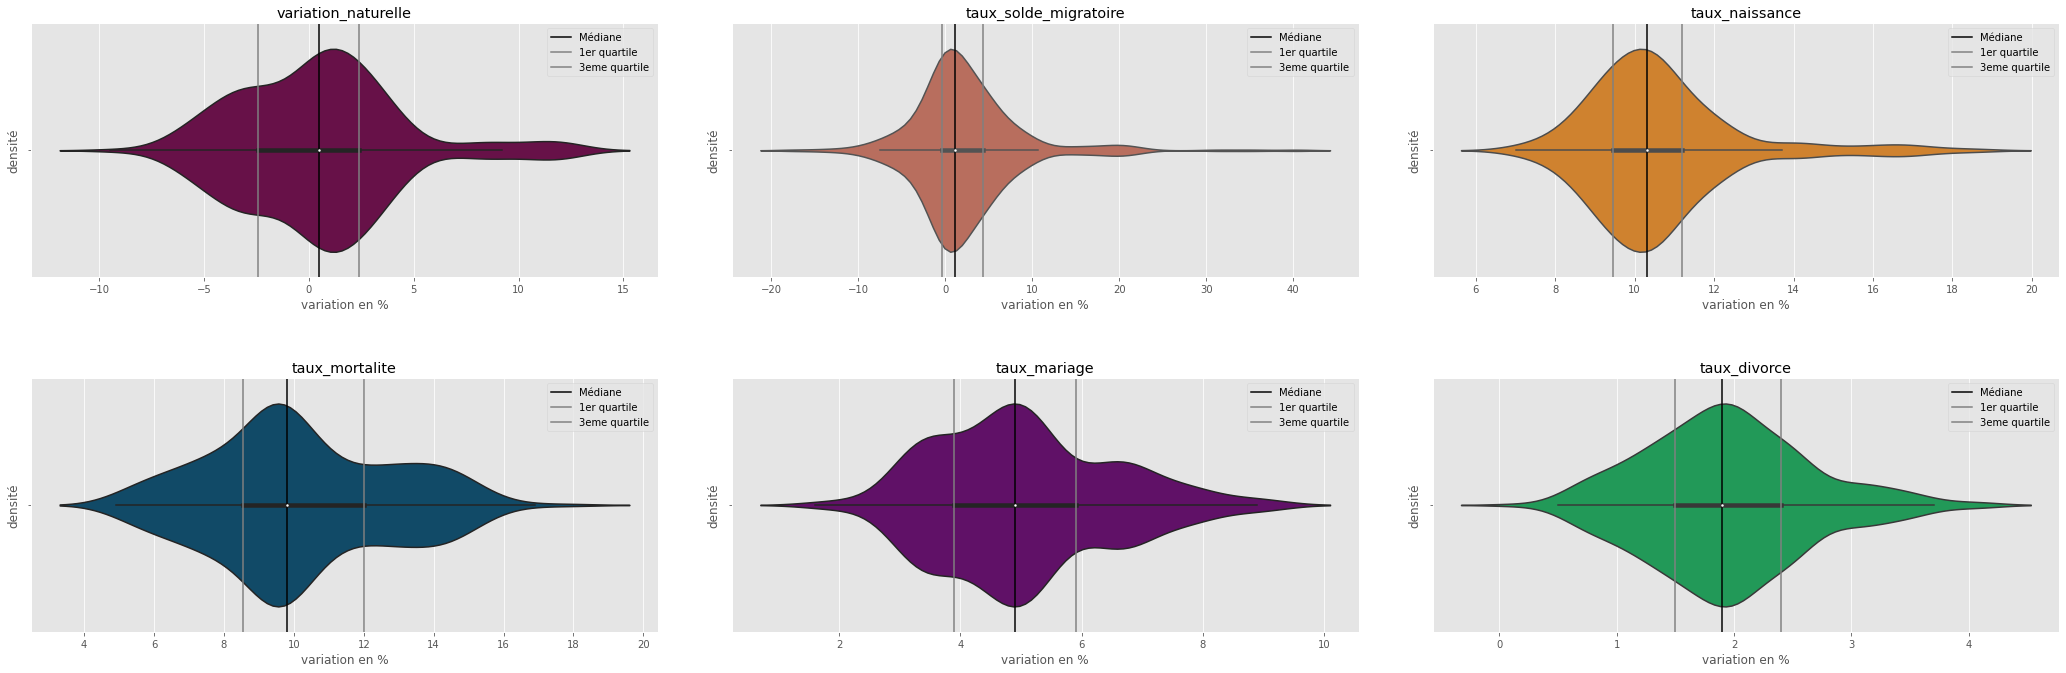

In [103]:
## Violinplot sur les variables

figure = plt.figure(figsize=(30, 15))
# variables à représenter
var = ['variation_naturelle', 'taux_solde_migratoire', 'taux_naissance', 'taux_mortalite','taux_mariage','taux_divorce']
# choix des couleurs
col = ['#75034C','#C7644F','#EA8314','#034F75', '#6C0375','#0EAD56']

for x in range(len(var)):
    # disposition figures
    figure.add_subplot(3, 3, x + 1)
    # espacement entre les figures
    figure.tight_layout(pad=5.0)
    # création des violinplots
    sns.violinplot(x=df[var[x]], color=col[x])
    plt.axvline(df[var[x]].median(), color ="black", label ="Médiane")
    plt.axvline(df[var[x]].quantile(0.25), color ="grey", label ="1er quartile")
    plt.axvline(df[var[x]].quantile(0.75), color ="grey", label ="3eme quartile")
    plt.title(var[x])
    plt.xlabel("variation en %")
    plt.ylabel("densité")
    plt.legend()


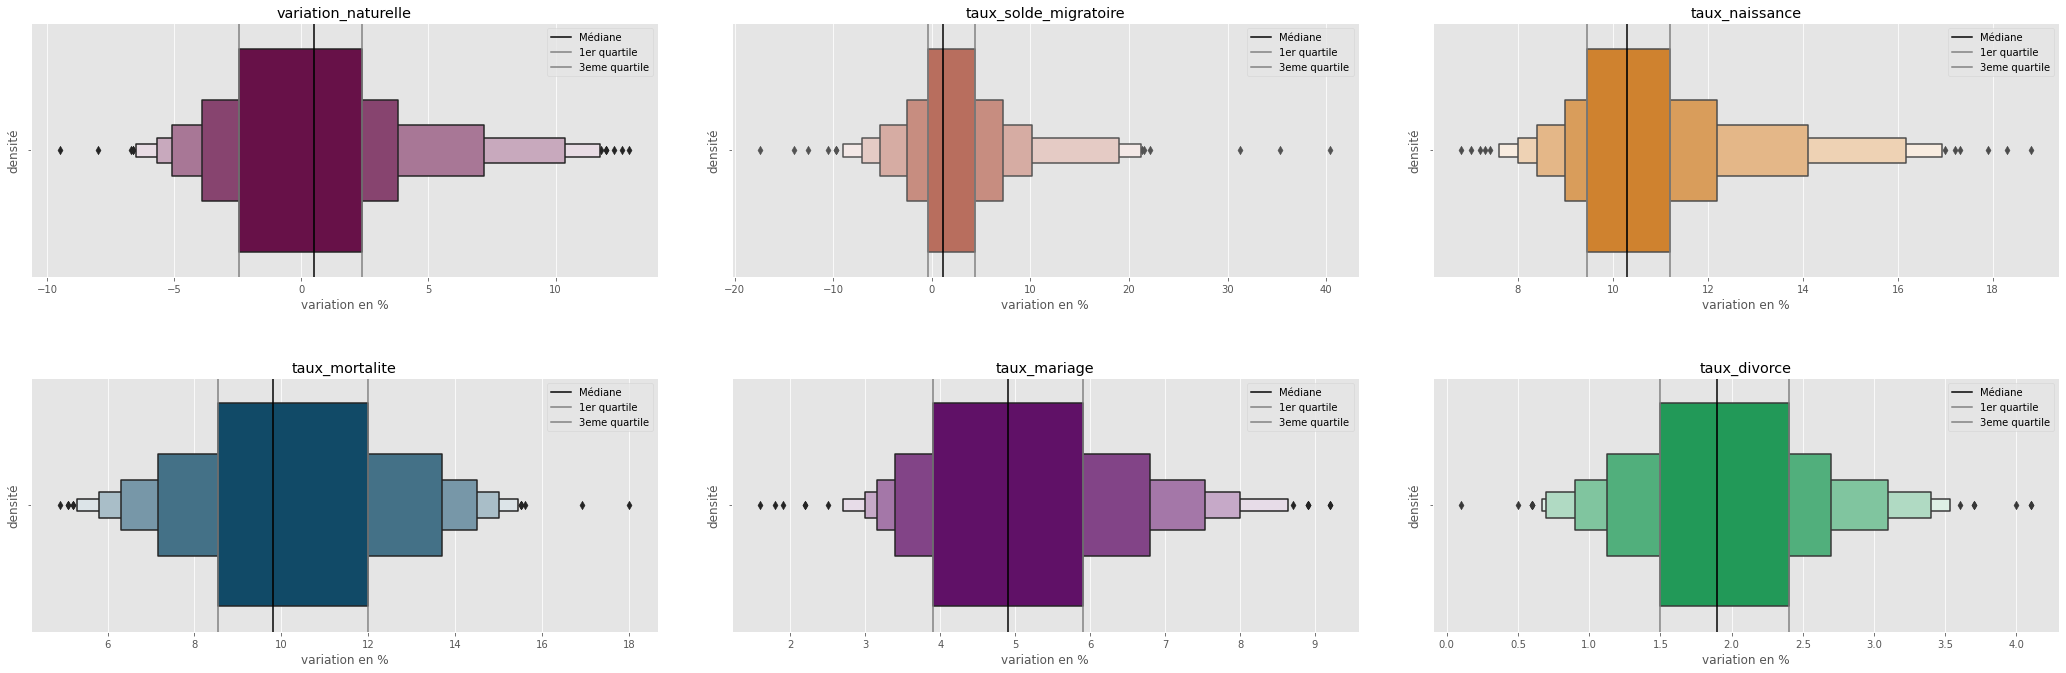

In [104]:
## Boxenplot sur les variables

figure = plt.figure(figsize=(30, 15))
# taux à afficher
var = ['variation_naturelle', 'taux_solde_migratoire', 'taux_naissance', 'taux_mortalite','taux_mariage','taux_divorce']
# choix des couleurs
col = ['#75034C','#C7644F','#EA8314','#034F75', '#6C0375','#0EAD56']

for x in range(len(var)):
    # disposition figures
    figure.add_subplot(3, 3, x + 1)
    # espacement entre les figures
    figure.tight_layout(pad=5.0)
    # création des boxenplots
    sns.boxenplot(x=df[var[x]], color=col[x])
    plt.axvline(df[var[x]].median(), color ="black", label ="Médiane")
    plt.axvline(df[var[x]].quantile(0.25), color ="grey", label ="1er quartile")
    plt.axvline(df[var[x]].quantile(0.75), color ="grey", label ="3eme quartile")
    plt.title(var[x])
    plt.xlabel("variation en %")
    plt.ylabel("densité")
    plt.legend()


In [105]:
## Evolution des variables de l'UE sur la période 2010-2020

# fonction qui renvoie une couleur tirée aléatoirement
def random_col():
    col = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
    return col

plt.rcParams['figure.figsize'] = [10,70] # dimension des figures dans Jupyer Notebook

var=['taux_naissance','taux_mortalite',
     'variation_naturelle', 'taux_solde_migratoire', 'variation_demographique',
     'taux_mariage', 'taux_divorce', 'indicateur_conjoncturel_fecondite','population']
for i in range(len(var)):
    plt.subplot(len(var),1,i+1) # subplot
    plt.plot(df_ue.Annee,df_ue[str(var[i])],color=random_col(),linewidth=4)
    plt.ticklabel_format(style = 'plain')
    plt.xlabel ('Année')
    plt.ylabel (str(var[i]))
    plt.title ("Evolution : "+str(var[i])+" - Union européenne (27)")
plt.subplots_adjust(wspace=0, hspace=0.2) # séparation entre les subplots
plt.show()



In [106]:
## Nuage de points animé (GIF)

# Création des graphiques du GIF 

# création du dossier où placer les images
if not os.path.exists('images_anim'):
    os.mkdir('images_anim')
        
# création des catégories icf : indicateur_conjoncturel_fecondite
df['icf_cat']=pd.Categorical(df['indicateur_conjoncturel_fecondite'])

for an in df.sort_values(by='Annee').Annee.unique(): # boucle pour réaliser le graphique pour chaque année
    
    # création de la figure
    fig=plt.figure(figsize=(12, 12))
    df_an=df[df.Annee==an] # dataframe d'1 année

    # création du nuage de points
    plt.scatter(
        x = df_an['taux_mortalite'], 
        y = df_an['taux_naissance'], 
        s=df_an['population']/10000, 
        c=df_an['icf_cat'], 
        alpha=0.7,  
        linewidth=1,
        cmap="BuPu")
    
    plt.xlabel("Taux de mortalité")
    plt.ylabel("Taux de naissance")
    plt.title("Année "+str(an),size=16,fontweight='bold')
    # échelle axes x et y
    plt.xlim(df['taux_mortalite'].min()-1,df['taux_mortalite'].max()+1);
    plt.ylim(df['taux_naissance'].min()-1,df['taux_naissance'].max()+1)
    
    # barre de couleur
    plt.colorbar(label='Indicateur conjoncturel de fécondité',orientation="horizontal")
    # choix de l'échelle de la colorbar
    plt.clim(df['indicateur_conjoncturel_fecondite'].min(), 
             df['indicateur_conjoncturel_fecondite'].max())
    
    # ajout de la légende : taille des bulles
    for pop in [100, 500, 1000]:
        plt.scatter([], [],c='k', alpha=0.4, s=pop,
                label=str(int(pop/100)) + ' millions hab')
    plt.legend(scatterpoints=1, 
               frameon=False, 
               labelspacing=2,
               bbox_to_anchor=(1.1,1), # position de la légende
               title='Population')
    
    # sauvegarde des images dans le dossier 'images_anim'
    plt.savefig(fname='images_anim/scatterplot_'+str(an)+'.png')
    
    plt.close(fig) # ne pas afficher la figure

In [107]:
# Création du GIF

# fichiers à récupérer
files= os.listdir("images_anim")

frames = []
for img in files:
    frame = Image.open('images_anim/'+img)
    frames.append(frame) # ajout des graphiques à la liste frames

# création et sauvegarde du GIF
frames[0].save('scatterplot_anim.gif', format='GIF',
              append_images=frames[1:],save_all=True,duration=1000, loop=0)

# affichage du GIF avec le module IPython.display
with open('scatterplot_anim.gif','rb') as file:
    display(ipd.Image(file.read()))

## Contribution et comparaison des dynamiques démographiques des pays

In [108]:
## Stackplots : Population, Nombre de naissance & nombre de décès

plt.rcParams['figure.figsize'] = [15, 15] # dimension des figures dans Jupyer Notebook

# variables à représenter & palette de couleurs choisie
varlist=['population','naissance','mortalite']
colorlist=['#7A7A7A',u'#023eff', u'#ff7c00', u'#1ac938', u'#e8000b', u'#8b2be2',u'#E72222', u'#de8f05', u'#029e73', u'#d55e00', u'#cc78bc', u'#ca9161', u'#fbafe4', u'#0D097E', u'#ece133', u'#56b4e9']

for i in range(len(varlist)): # boucle sur les variables à analyser (liste varlist)
    plt.subplot(3,1,i+1) # subplot

    # séparation du dataframe entre les pays les plus peuplés (> médiane) et les autres
    df_stack=df[df[varlist[i]] > df[varlist[i]].describe()[5]]
    df_autre=df[df[varlist[i]] <= df[varlist[i]].describe()[5]]
    # création d'une liste avec les données des pays "autres" agrégées par somme
    list_autre = list(df_autre.groupby('Annee')[varlist[i]].sum())  
    
    df_stack = df_stack.rename({varlist[i]: 'var_i'}, axis=1) # renommage de varlist[i] en var_i pour la suite
    
    # x : années
    x = list(range(df_stack.Annee.min(),df_stack.Annee.max()+1))

    # ajout des pays "autres" à notre liste y
    labels_pays=['Autres']
    y=[list_autre]
    # récupération des valeurs et noms de pays à représenter dans nos listes y et labels_pays 
    for pays in df_stack.Pays.unique():
        dfpays = df_stack[df_stack.Pays == pays]
        if len(list(dfpays.var_i))==len(x):
            y.append(list(dfpays.var_i))
            labels_pays.append(pays)

    # création du graphique
    plt.stackplot(x,y, labels=labels_pays, colors=colorlist, alpha=0.9 )
    plt.legend(loc='upper right')
    plt.title(varlist[i].capitalize(),size=14,fontweight='bold')
    plt.ylabel(varlist[i].capitalize())
    plt.xlabel('Année')
    
plt.subplots_adjust(wspace=0, hspace=0.25) # séparation entre les subplots
plt.show()


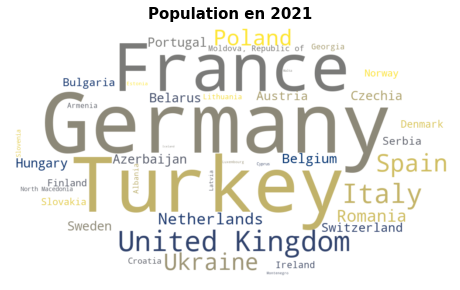

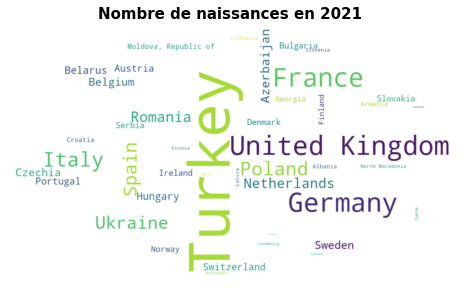

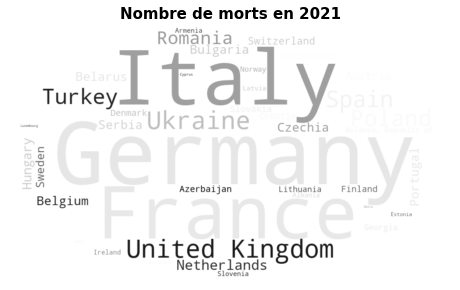

In [130]:
## Wordclouds : Population, Nombre de naissance & nombre de décès

plt.rcParams['figure.figsize'] = [8, 8] # dimension des figures dans Jupyer Notebook

# choix de la forme du wordcloud à partir d'une image importée
ellipse = np.array(Image.open("ellipse.png"))

# choix des variables et palettes de couleurs à représenter
colorlist=['cividis','viridis','Greys']
varlist=['population','naissance','mortalite']
titlelist=['population en 2021','nombre de naissances en 2021','nombre de morts en 2021']

for i in range(len(varlist)): # boucle sur les variables
    # dataframe avec une seule variable
    df_var=df.loc[:,['Pays',varlist[i]]]
    # création d'un dictionnaire avec les pays et leur population
    dico_var = {}
    for x,y in df_var.values:
        dico_var[x] = y
    # création d'un objet wordcloud qui prend les fréquences de population
    wordcloud = WordCloud(background_color="white",
                          margin=0,
                          colormap=colorlist[i],
                          mask=ellipse)
    wordcloud.generate_from_frequencies(frequencies=dico_var)
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title (titlelist[i].capitalize(),size=15,fontweight='bold')
    plt.axis("off")
    plt.show()

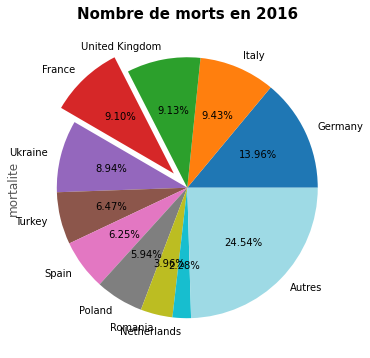

In [110]:
## Pieplots : Population, Nombre de naissance & nombre de décès

plt.rcParams['figure.figsize'] = [8, 6] # dimension des figures dans Jupyer Notebook

# choix de variables, couleurs à représenter
varlist=['population','naissance','mortalite']
titlelist=['population en 2016','nombre de naissances en 2016','nombre de morts en 2016']
colorlist=['tab20b','tab20c','tab20']

# choix d'une année
dfan = df[df.Annee == 2016]

for i in range(len(varlist)): # boucle sur les variables
    dfan = dfan.sort_values(by=varlist[i],ascending=False)
    #  20 pays dans la catégorie : Autres
    dfan_2 = dfan[:10].copy()
    autres = pd.DataFrame(data = {'Pays' : ['Autres'],
        varlist[i] : [dfan[varlist[i]][10:].sum()]})
    # concatenation de 10 pays + "Autres"
    dfan_2 = pd.concat([dfan_2, autres])
    
    # liste explode pour séparer la part France du piechart si elle existe
    explode_list=[0] * len(dfan_2.Pays) # liste de base : liste de 0 
    if 'France' in list(dfan_2.Pays):
        explode_list[list(dfan_2.Pays).index('France')]=0.15
        
    # réalisation du pieplot
    dfan_2.plot(kind = 'pie', y = varlist[i],
                  labels = dfan_2['Pays'],
                  colormap=colorlist[i],
                  autopct = lambda x:'{:.2f}%'.format(x,(x/100)), # affichage des pourcentages
                  explode = explode_list, # séparation de la part France
                  figsize = (6,6))
    
    plt.title(titlelist[i].capitalize(),size=15,fontweight='bold')
    plt.legend('',frameon=False) # suppression de la légende
    plt.show()

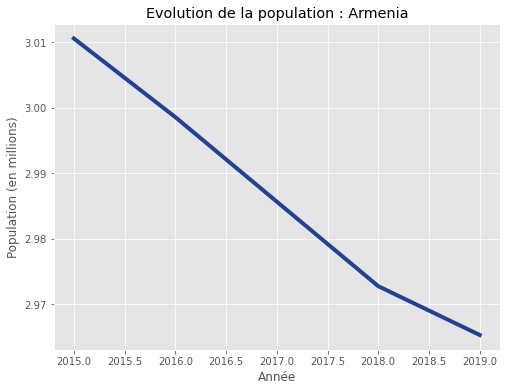

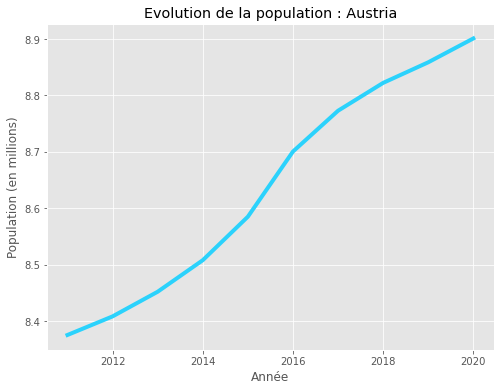

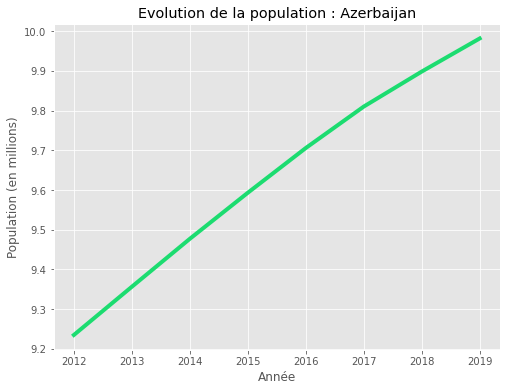

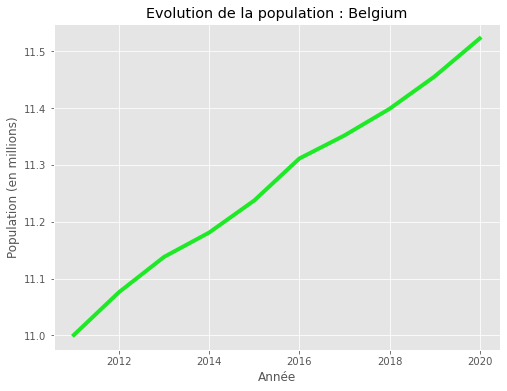

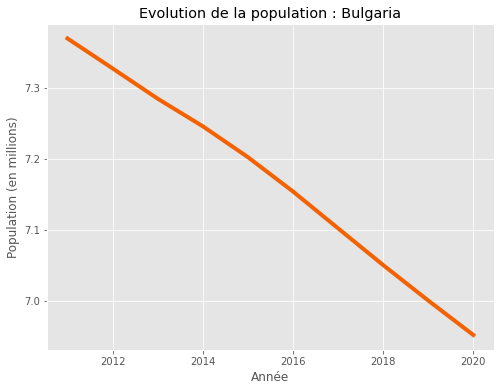

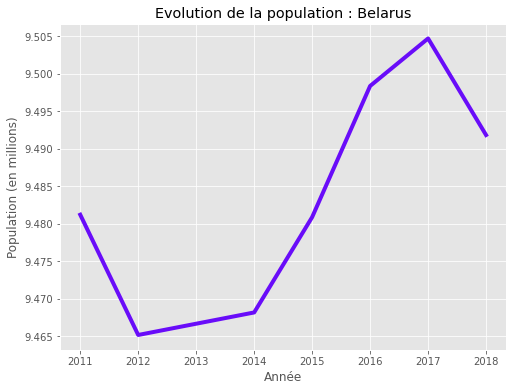

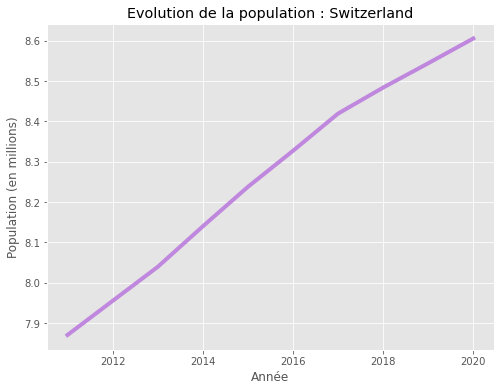

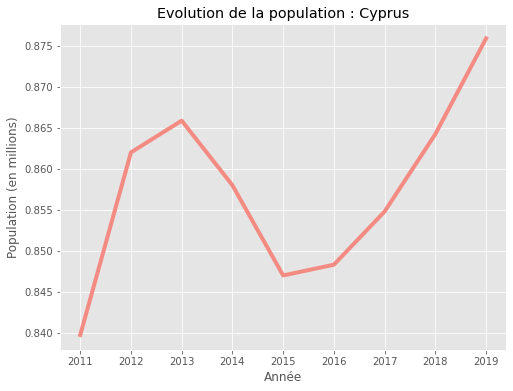

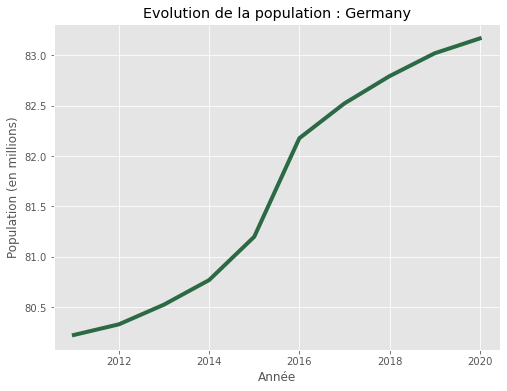

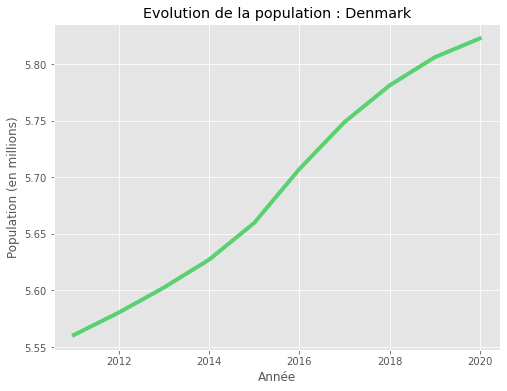

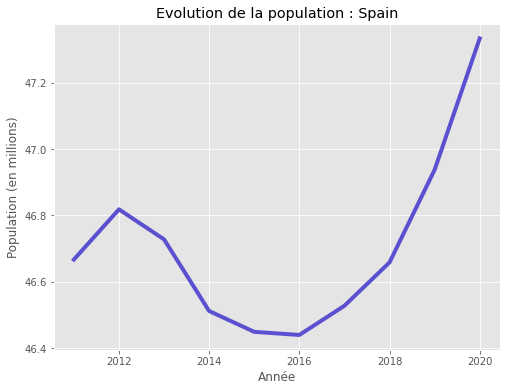

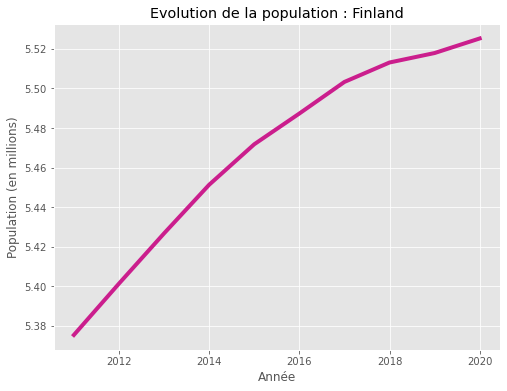

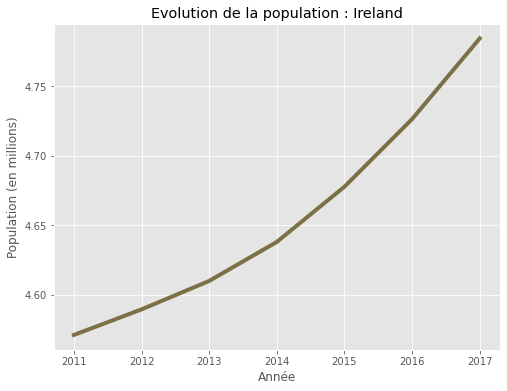

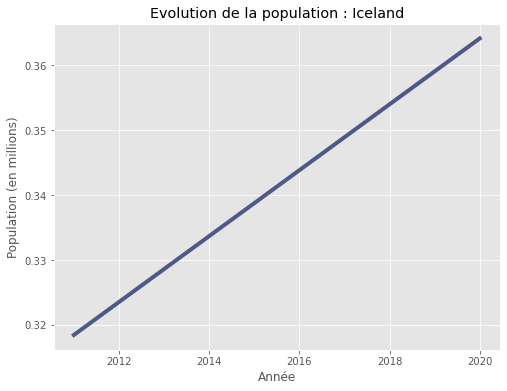

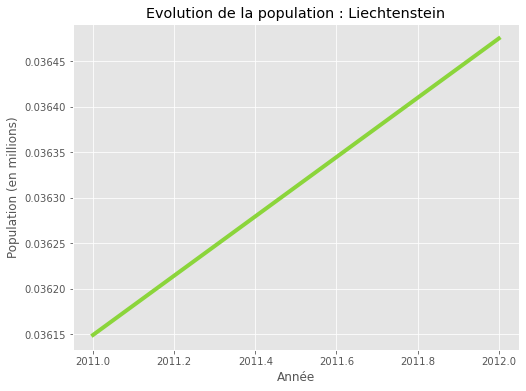

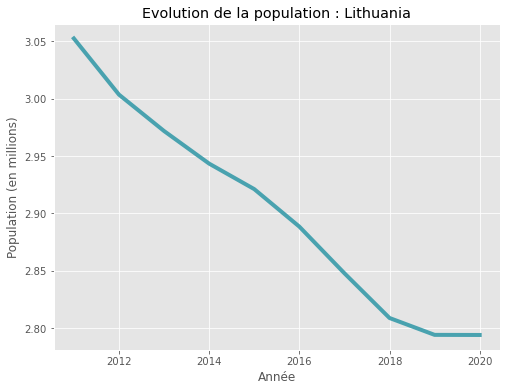

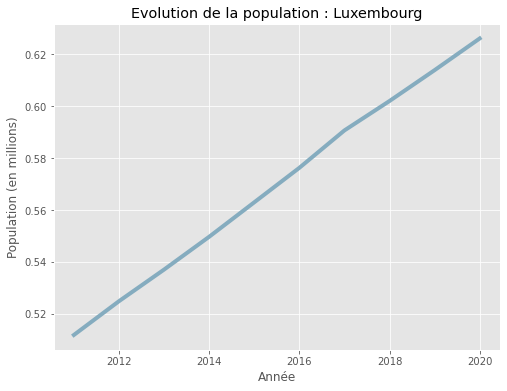

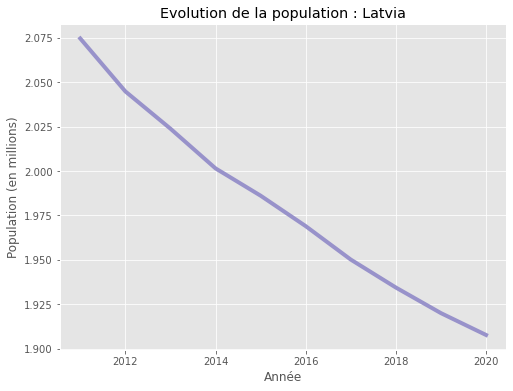

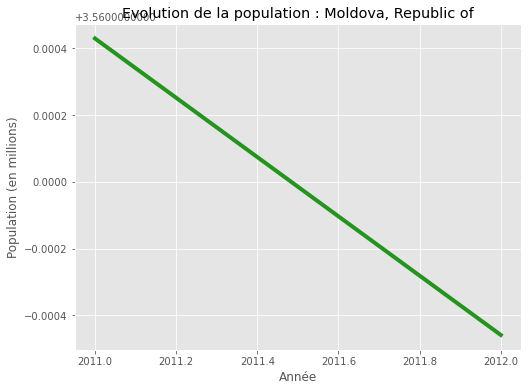

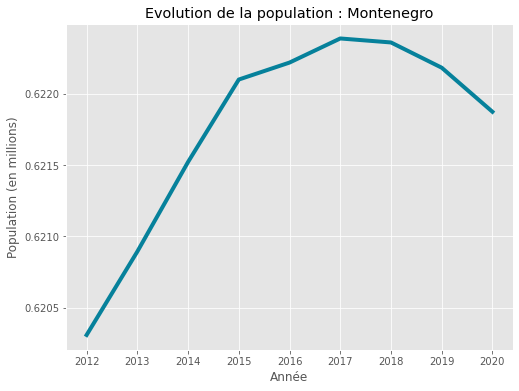

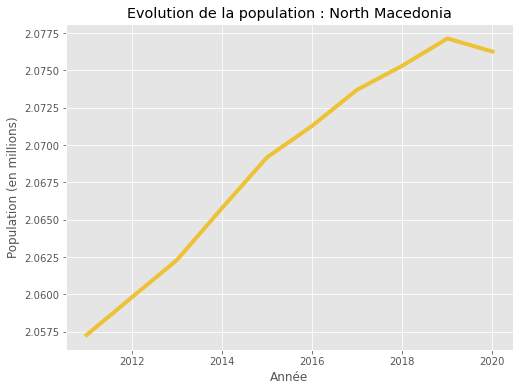

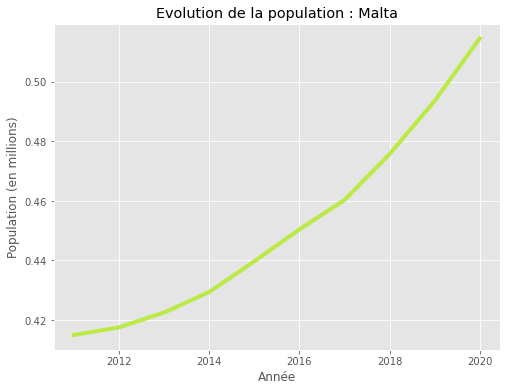

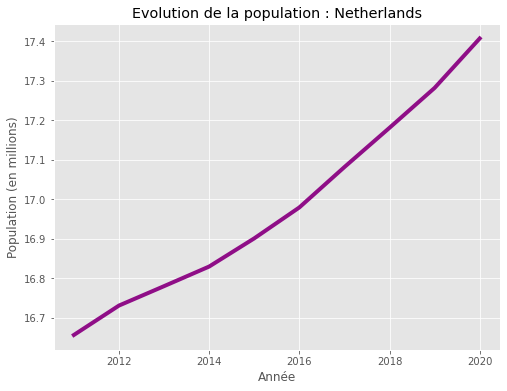

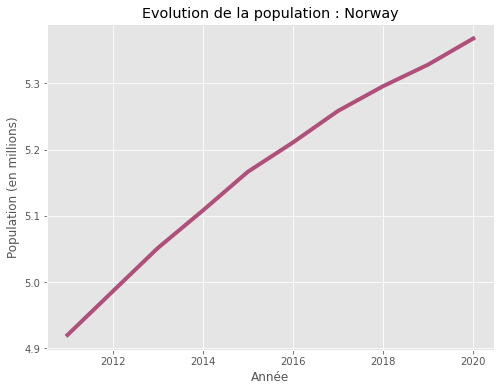

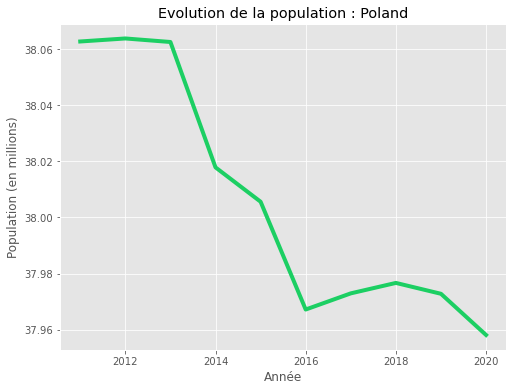

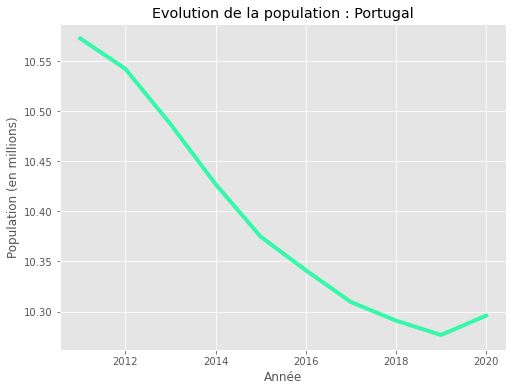

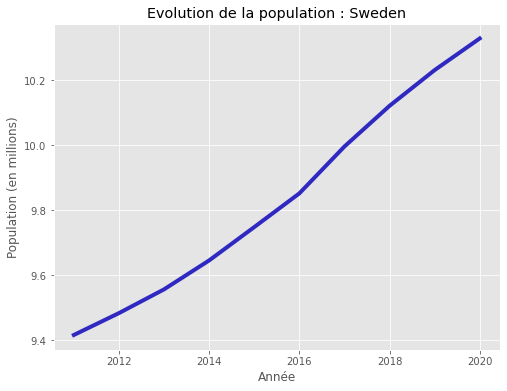

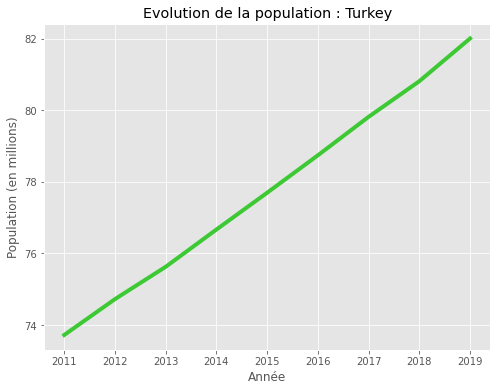

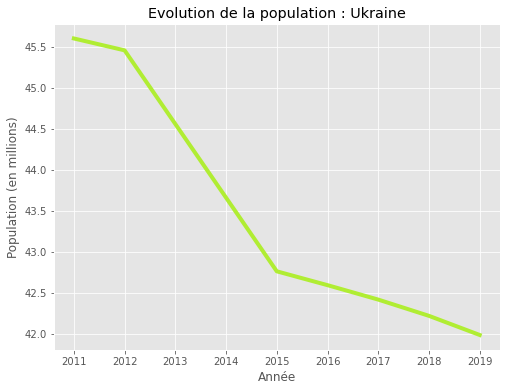

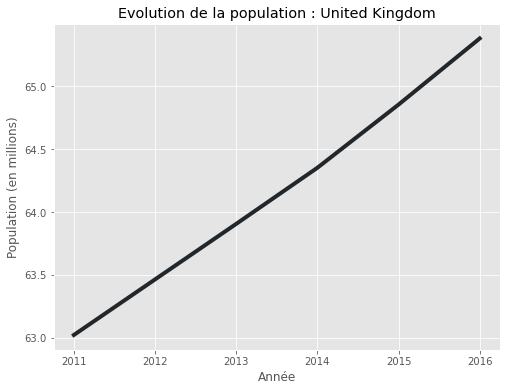

In [111]:
## Evolution de la population par pays sur la période 2010-2020

for i in df.Pays.unique():
    df_pays=df.loc[df['Pays']==i]
    plt.plot(df_pays.Annee,df_pays.population/1000000,color=random_col(),linewidth=4)
    plt.ticklabel_format(style = 'plain')
    plt.xlabel ('Année')
    plt.ylabel ('Population (en millions)')
    plt.title ("Evolution de la population : "+i)
    plt.show()

In [112]:
## Tableau de comparaison des pays sur 4 variables

pd.set_option('precision', 2) # nombre de décimales affichées

df_agg = df.groupby('Pays').agg('mean').sort_values(by="variation_demographique",ascending=False) # agrégation (moyenne)
# choix de 4 variables
df_agg=df_agg.loc[:,['taux_naissance','taux_mortalite','taux_solde_migratoire','variation_demographique']]
gmap = df_agg.to_numpy() # tableau pour définir les couleurs de chaque case
# création du tableau
df_agg.style.background_gradient(axis=None, gmap=gmap,
    cmap='vlag_r', subset=['taux_naissance', 'taux_mortalite', 'taux_solde_migratoire','variation_demographique'])


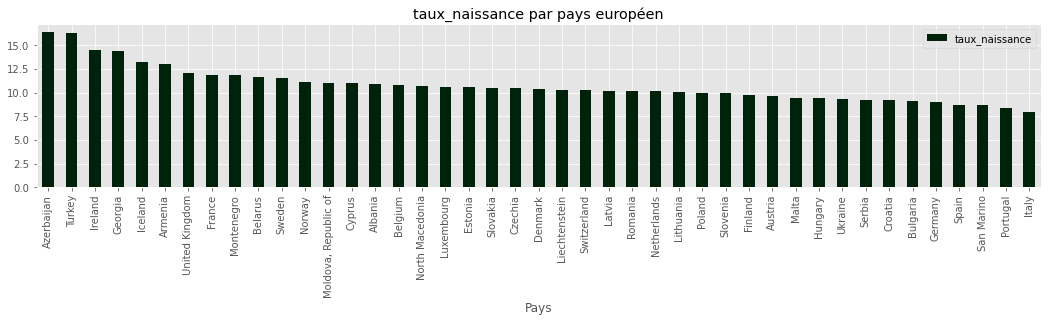

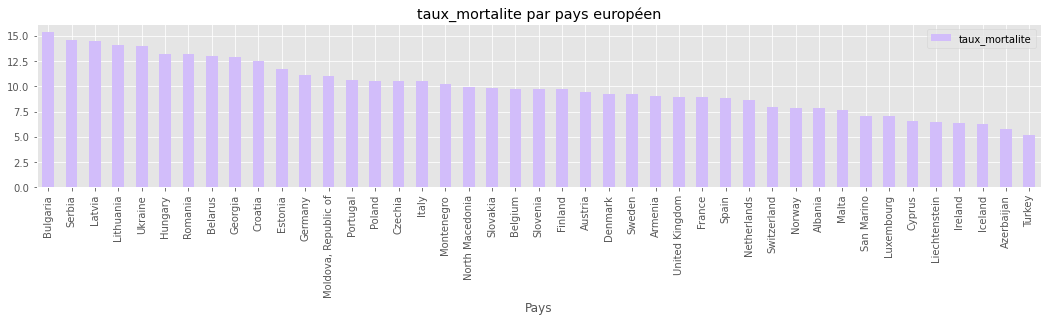

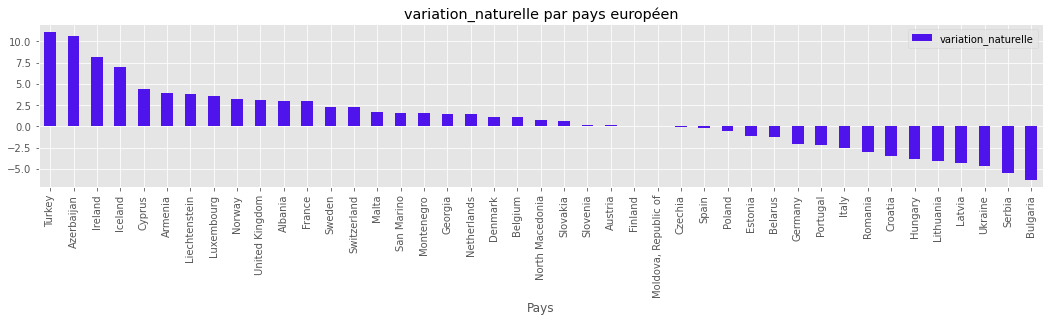

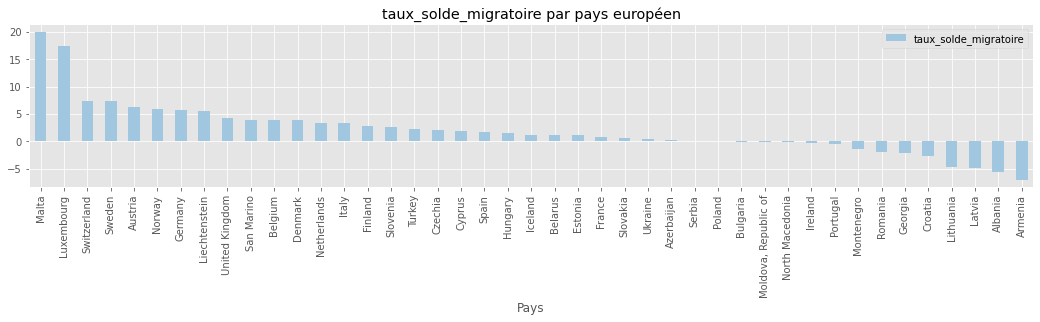

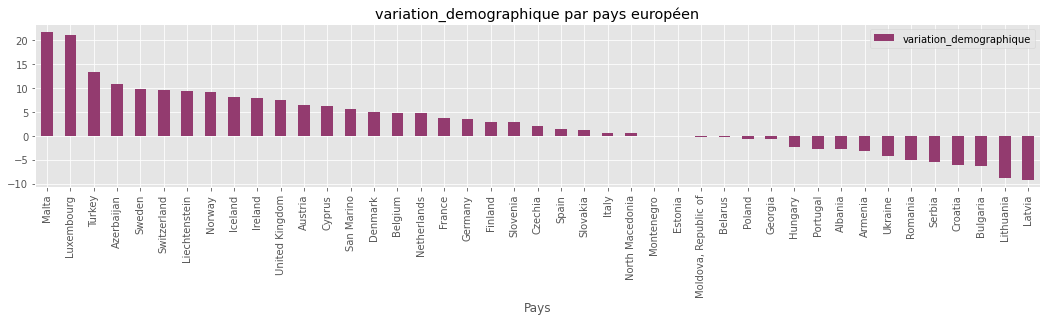

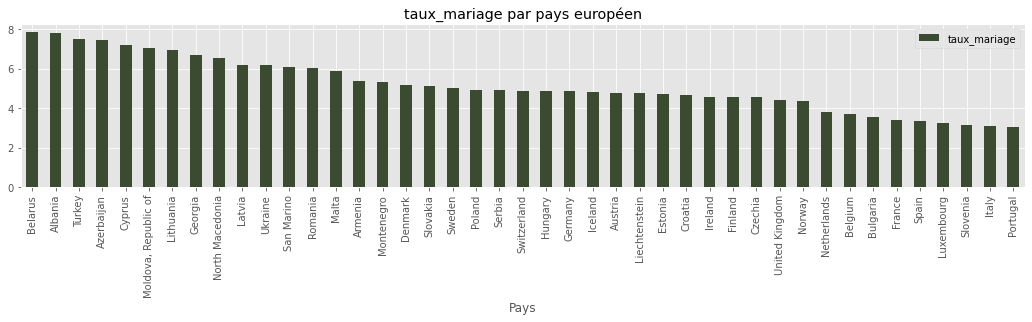

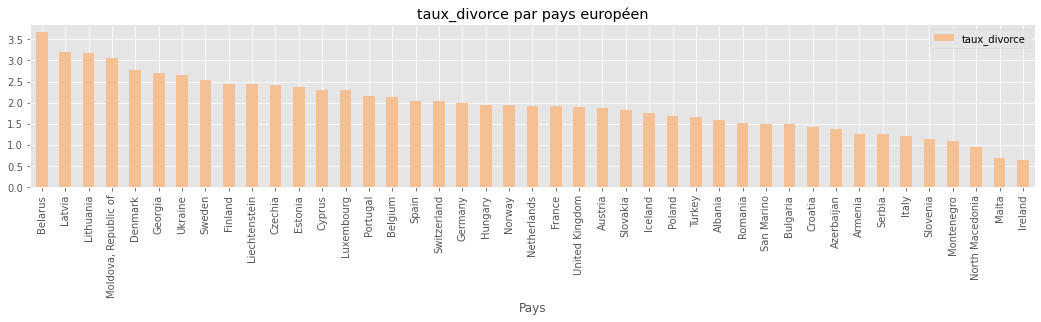

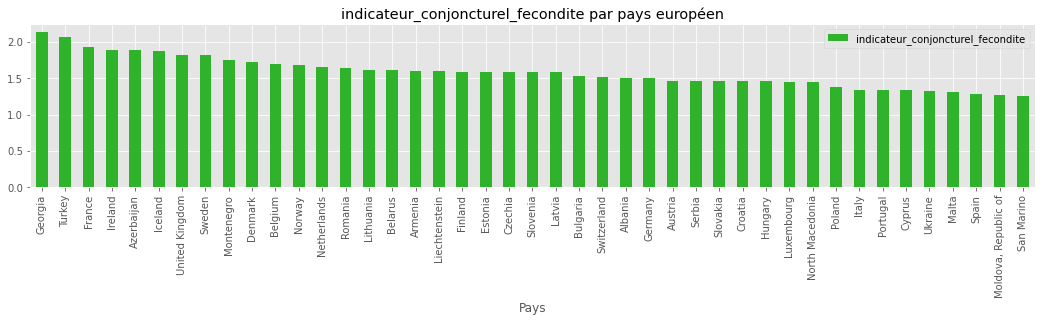

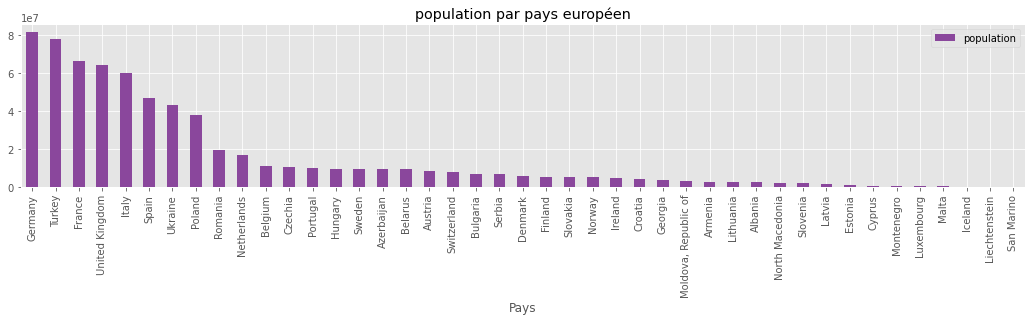

In [113]:
## Barplots de l'ensemble des variables

# variables à représenter
var=['taux_naissance','taux_mortalite',
     'variation_naturelle', 'taux_solde_migratoire', 'variation_demographique',
     'taux_mariage', 'taux_divorce', 'indicateur_conjoncturel_fecondite','population']

# représentation du barplot de chaque variable
for x in range(len(var)):
    df.groupby(['Pays']).agg({var[x]:'mean'}).sort_values(by=var[x],ascending=False).plot.bar(title=str(var[x])+" par pays européen",figsize=(18,3),color=random_col())

<function matplotlib.pyplot.show(close=None, block=None)>

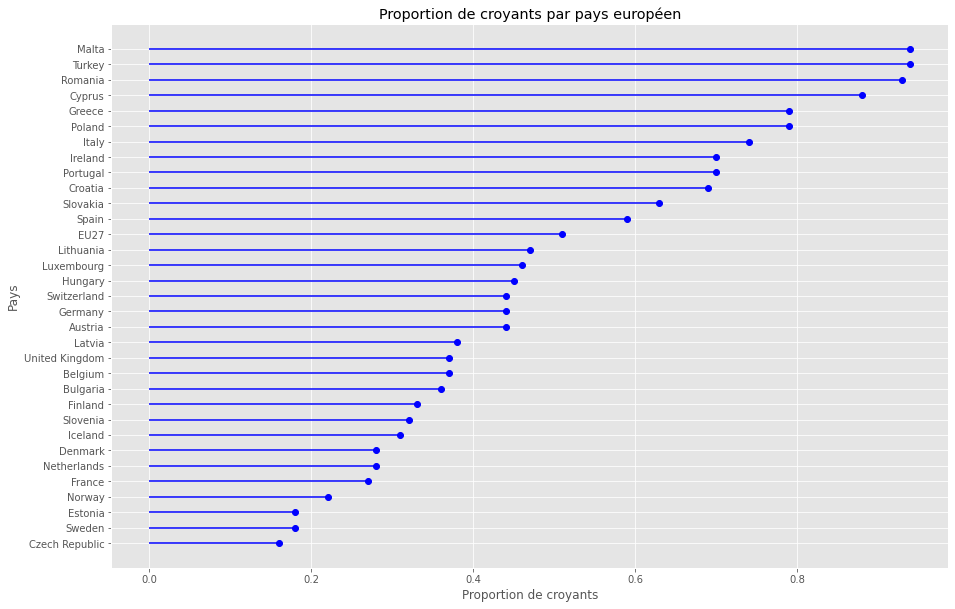

In [114]:
#### Lollipop plot du data frame religiosity 

plt.rcParams['figure.figsize'] = [15,10] # dimension des figures dans Jupyer Notebook

dfr_s = dfr.sort_values(by='%_croyants')
dfr_range=range(1,len(dfr.index)+1)
 
plt.hlines(y=dfr_range, xmin=0, xmax=dfr_s['%_croyants'], color='blue')
plt.plot(dfr_s['%_croyants'], dfr_range, "bo")
 
# Légende
plt.yticks(dfr_range, dfr_s['Country'])
plt.title("Proportion de croyants par pays européen")
plt.xlabel('Proportion de croyants')
plt.ylabel('Pays')

# Affichage du graphique
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

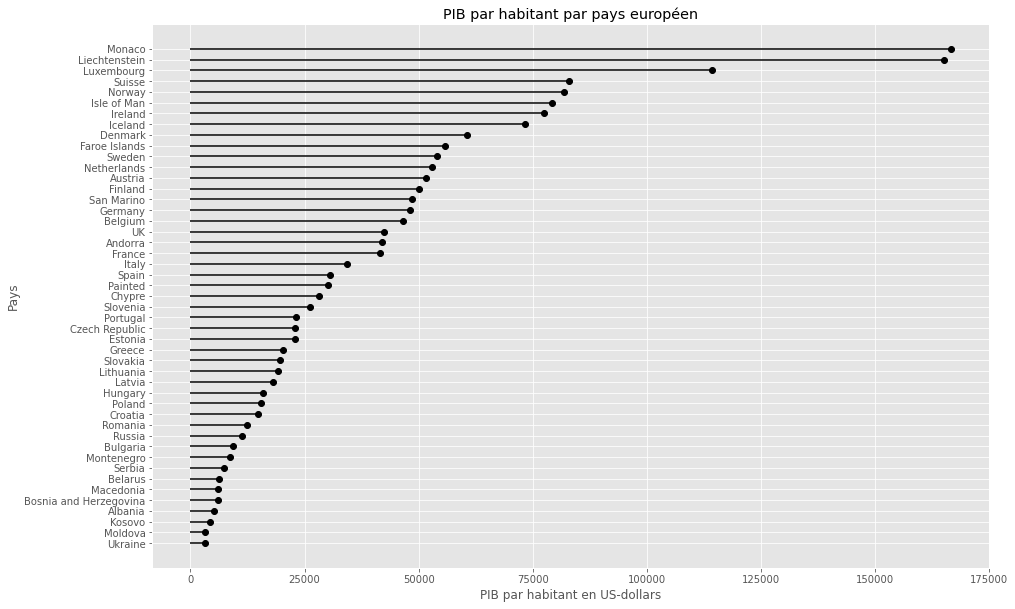

In [115]:
#### Lollipop plot du data frame PIB_hab

plt.rcParams['figure.figsize'] = [15,10] # dimension des figures dans Jupyer Notebook

dfph_s = dfph.sort_values(by='PIB_hab')
dfph_range=range(1,len(dfph.index)+1)
 
plt.hlines(y=dfph_range, xmin=0, xmax=dfph_s['PIB_hab'], color='black')
plt.plot(dfph_s['PIB_hab'], dfph_range, "ko")
 
# Légende
plt.yticks(dfph_range, dfph_s['Pays'])
plt.title("PIB par habitant par pays européen")
plt.xlabel('PIB par habitant en US-dollars')
plt.ylabel('Pays')

# Affichage du graphique
plt.show

## Lien entre les variables et facteurs explicatifs

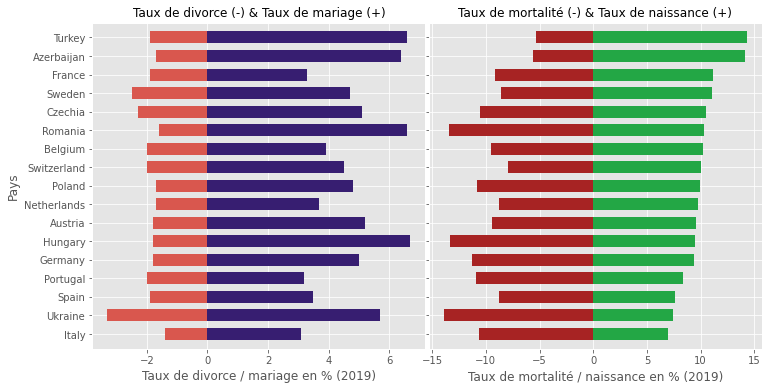

In [116]:
## Comparaison taux de mariage/divorce & taux de naissance/mortalité

plt.rcParams['figure.figsize'] = [12, 6] # dimension des figures dans Jupyer Notebook

# choix du dataframe mariage/divorce & (tx_naissance/tx_mortalité) à représenter : 
# année 2019 & pays dont la population est supérieure à la médiane
df_md = df[ (df.Annee == 2019)&(df.population>=df["population"].describe()[5])]

# Plot taux_divorce/taux_mariage #############################################################################################

plt.subplot(1,2,1) 

# passage de taux de divorce en négatif
df = df[df['taux_divorce'].notnull()].copy()
df_md["taux_divorce"]=-df_md["taux_divorce"]

df_md = df_md.sort_values(by='taux_naissance')
nb_pays=range(1,len(df_md.index)+1)

# lignes : taux_mariage
plt.hlines(y=nb_pays, xmin=0, xmax=df_md['taux_mariage'], color='#371E71',linewidth=12)
# lignes : taux_divorce
plt.hlines(y=nb_pays, xmin=df_md['taux_divorce'], xmax=0, color='#D9574E',linewidth=12)

# légende
plt.yticks(nb_pays, df_md['Pays'])
plt.title("Taux de divorce (-) & Taux de mariage (+)",size=12)
plt.xlabel('Taux de divorce / mariage en % (2019)')
plt.ylabel('Pays')

# Plot taux_naissance/taux_mortalite #########################################################################################

plt.subplot(1,2,2) 

df = df[df['taux_mortalite'].notnull()].copy()
df_md["taux_mortalite"]=-df_md["taux_mortalite"]

df_md = df_md.sort_values(by='taux_naissance')
nb_pays=range(1,len(df_md.index)+1)

plt.hlines(y=nb_pays, xmin=0, xmax=df_md['taux_naissance'], color='#23A745',linewidth=12)
plt.hlines(y=nb_pays, xmin=df_md['taux_mortalite'], xmax=0, color='#A72323',linewidth=12)

# légende
# suppression de la graduation de l'axe y pour le 2ème graphique
df_md["space"]=""
plt.yticks(nb_pays,df_md['space'])
plt.title("Taux de mortalité (-) & Taux de naissance (+)",size=12)
plt.xlabel('Taux de mortalité / naissance en % (2019)')

# disposition des subplots
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.show()


Text(0.5, 1.0, 'Matrice de corrélation de toutes les observations')

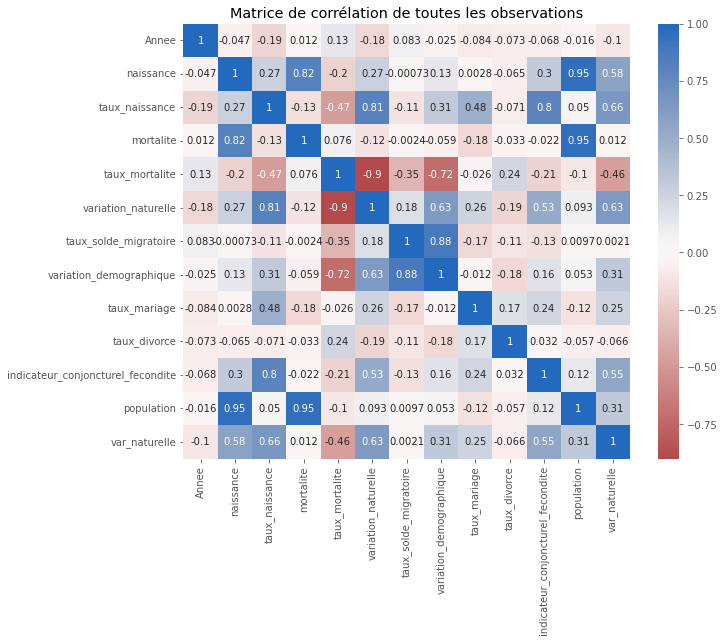

In [117]:
## Matrice de corrélation de toutes les observations du data frame data_demography

cor_matrix = df.corr()
fig = plt.figure(figsize=(10, 8))

# heatmap à partir de la matrice de correlation
sns.heatmap(cor_matrix , annot=True, cmap="vlag_r", center=0)
plt.title("Matrice de corrélation de toutes les observations")

LinregressResult(slope=0.370438292380876, intercept=1.1053602903783517, rvalue=0.484298988219655, pvalue=9.580724528205668e-23, stderr=0.03522154466326013, intercept_stderr=0.37970531127767226)


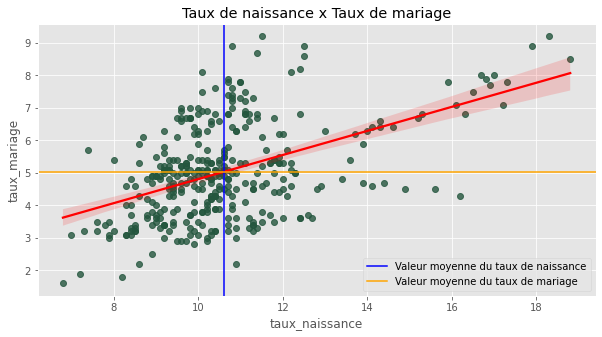

In [118]:
## Nuages de points & Régressions linéaires

## Taux de naissance x Taux de mariage
plt.figure(figsize=(10,5))

sns.regplot(x=df.taux_naissance, y=df.taux_mariage,
            scatter_kws={"color": "#24563E"}, line_kws={"color": "red"})
plt.axvline(df.taux_naissance.mean(), color ="blue", label ="Valeur moyenne du taux de naissance")
plt.axhline(df.taux_mariage.mean(), color ="orange", label ="Valeur moyenne du taux de mariage")

plt.title("Taux de naissance x Taux de mariage")
plt.legend()

print(scipy.stats.linregress(df.taux_naissance,df.taux_mariage)) # régression linéaire

LinregressResult(slope=0.0639193747934632, intercept=1.2839305086455064, rvalue=0.23898849144793669, pvalue=4.133966843490203e-06, stderr=0.013668824832924906, intercept_stderr=0.14362076374916743)


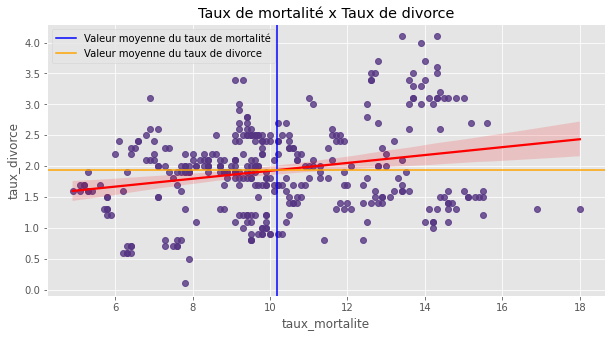

In [119]:
## Taux de mortalité x Taux de divorce

plt.figure(figsize=(10,5))

sns.regplot(x=df.taux_mortalite, y=df.taux_divorce,
            scatter_kws={"color": "#563683"}, line_kws={"color": "red"})
plt.axvline(df.taux_mortalite.mean(), color ="blue", label ="Valeur moyenne du taux de mortalité")
plt.axhline(df.taux_divorce.mean(), color ="orange", label ="Valeur moyenne du taux de divorce")

plt.title("Taux de mortalité x Taux de divorce")
plt.legend()
print(scipy.stats.linregress(df.taux_mortalite,df.taux_divorce)) # régression linéaire

LinregressResult(slope=-3.7900350940549035, intercept=8.25590051939093, rvalue=-0.12877560686231504, pvalue=0.014077732314853927, stderr=1.5361189484335496, intercept_stderr=2.4440774837079506)


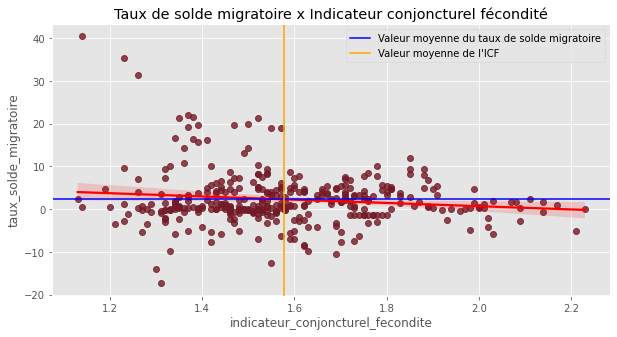

In [120]:
## Taux de solde migratoire x Indicateur conjoncturel fécondité

plt.figure(figsize=(10,5))

sns.regplot(x=df.indicateur_conjoncturel_fecondite,y=df.taux_solde_migratoire,
            scatter_kws={"color": "#731A27"}, line_kws={"color": "red"})
plt.axhline(df.taux_solde_migratoire.mean(), color ="blue", label ="Valeur moyenne du taux de solde migratoire")
plt.axvline(df.indicateur_conjoncturel_fecondite.mean(), color ="orange", label ="Valeur moyenne de l'ICF")

plt.title("Taux de solde migratoire x Indicateur conjoncturel fécondité")
plt.legend()

print(scipy.stats.linregress(df.indicateur_conjoncturel_fecondite,df.taux_solde_migratoire)) # régression linéaire

LinregressResult(slope=-0.8457961154426932, intercept=10.89061510593142, rvalue=-0.35234567540884065, pvalue=4.749441768625343e-12, stderr=0.1182384241581211, intercept_stderr=1.2423520668128716)


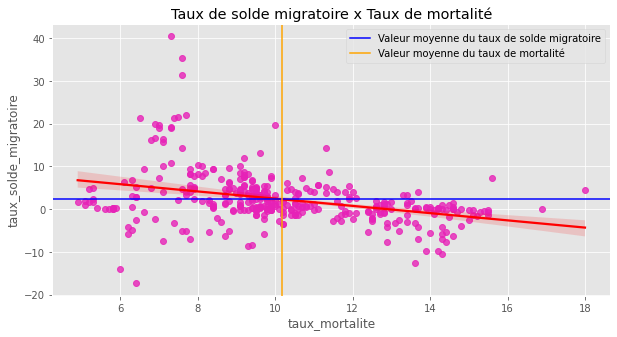

In [121]:
## Taux de solde migratoire x Taux de mortalité

plt.figure(figsize=(10,5))

sns.regplot(x=df.taux_mortalite,y=df.taux_solde_migratoire,
            scatter_kws={"color": "#E722B7"}, line_kws={"color": "red"})
plt.axhline(df.taux_solde_migratoire.mean(), color ="blue", label ="Valeur moyenne du taux de solde migratoire")
plt.axvline(df.taux_mortalite.mean(), color ="orange", label ="Valeur moyenne du taux de mortalité")

plt.title("Taux de solde migratoire x Taux de mortalité")
plt.legend()

print(scipy.stats.linregress(df.taux_mortalite,df.taux_solde_migratoire)) # régression linéaire

In [122]:
## Cartes leaflet : Taux de naissance, pourcentage de croyants, PIB/hab

# données pour une année
df_an=df.loc[(df['Annee']==2016)]

# map geojson de l'Europe importé depuis le contenu d'un github d'un utilisateur
url = ("https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON")
europe = f"{url}/europe.geojson"

# création de la map de base centrée sur l'Europe
m = folium.Map(location=[54, 15], zoom_start=4)

# création de la couche Choropleth sur la map de base
choro=folium.Choropleth(
    geo_data=europe,
    name="choropleth",
    data=df_an,
    columns=["Pays", "taux_naissance"],
    key_on="feature.properties.NAME",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Taux de naissance en % (2016)",
    highlight = True).add_to(m)


# ajout des labels sur les pays de la carte : pour cela, il faut modifier des features de notre fichier geojson
df_index_pays = df_an.set_index('Pays') # dataframe avec pays comme nom de ligne
# rajout pour chaque pays d'une propriété taux_naissance correspondant aux taux de naissance de mon dataframe df
for i in choro.geojson.data['features']:
    # pour les pays du fichier json qui ne sont pas dans mon data frame, affectons une valeur nulle
    if i['properties']['NAME'] not in df_index_pays.index.values:
        i['properties']['taux_naissance']=0
    else:
        i['properties']['taux_naissance'] = df_index_pays.loc[i['properties']['NAME'], 'taux_naissance']

# ajout du nouveau geojson 
folium.GeoJsonTooltip(['NAME', 'taux_naissance']).add_to(choro.geojson)

# ajout de fonds de carte à selectionner
for tile in ['cartodbpositron', 'cartodbdark_matter', 'Stamen Water Color']:
    folium.TileLayer(tile).add_to(m)
folium.LayerControl().add_to(m)

# ajout d'un marker/jalon : ma position
folium.Marker([48.116742125211864, -1.6764262235284], tooltip="Université Rennes I").add_to(m)

m # Affichage de la carte


In [123]:
# création de la map de base centrée sur l'Europe
m = folium.Map(location=[54, 15], zoom_start=4)

# création de la couche Choropleth sur la map de base
choro=folium.Choropleth(
    geo_data=europe,
    name="choropleth",
    data=dfr,
    columns=["Country", "%_croyants"],
    key_on="feature.properties.NAME",
    fill_color="RdPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Proportion de croyants (2019)",
    highlight = True).add_to(m)

# ajout des labels
df_index_pays = dfr.set_index('Country')
for i in choro.geojson.data['features']:
    if i['properties']['NAME'] not in df_index_pays.index.values:
        i['properties']['%_croyants']=0
    else:
        i['properties']['%_croyants'] = df_index_pays.loc[i['properties']['NAME'], '%_croyants']*100

# ajout du nouveau geojson 
folium.GeoJsonTooltip(['NAME', '%_croyants']).add_to(choro.geojson)

# ajout des fonds de carte à selectionner
for tile in ['cartodbpositron', 'cartodbdark_matter', 'Stamen Water Color']:
    folium.TileLayer(tile).add_to(m)
folium.LayerControl().add_to(m)

m

In [124]:
# création de la map de base centrée sur l'Europe
m = folium.Map(location=[54, 15], zoom_start=4)

# création de la couche Choropleth sur la map de base
choro=folium.Choropleth(
    geo_data=europe,
    name="choropleth",
    data=dfph,
    columns=["Pays", "PIB_hab"],
    key_on="feature.properties.NAME",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="PIB par habitant (2018)",
    highlight = True).add_to(m)

df_index_pays = dfph.set_index('Pays') # On choisit pays comme nom de ligne

for i in choro.geojson.data['features']:
    if i['properties']['NAME'] not in df_index_pays.index.values:
        i['properties']['PIB_hab']=0
    else:
        i['properties']['PIB_hab'] = int(df_index_pays.loc[i['properties']['NAME'], 'PIB_hab'])
    
folium.GeoJsonTooltip(['NAME', 'PIB_hab']).add_to(choro.geojson)

for tile in ['cartodbpositron', 'cartodbdark_matter', 'Stamen Water Color']:
    folium.TileLayer(tile).add_to(m)
folium.LayerControl().add_to(m)

m

Text(0.5, 1.0, "Matrice de corrélation de l'ensemble des variables")

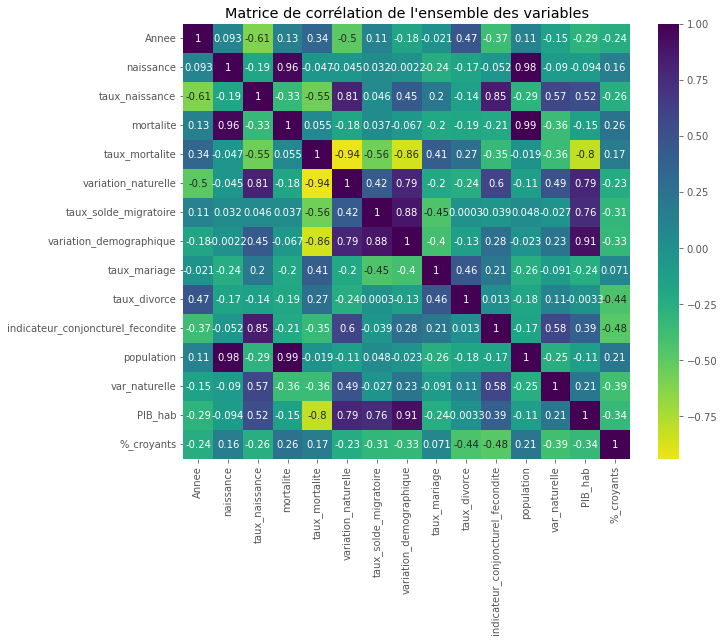

In [125]:
## Fusion des 3 data frames à partir d'une agrégation par la moyenne du premier
df_agg=df.groupby('Pays').agg('mean')
df_agg=df_agg.merge(dfph, left_on='Pays', right_on='Pays')
df_agg=df_agg.merge(dfr, left_on='Pays', right_on='Country')

## Matrice de corrélation de l'ensemble des variables

cor_matrix = df_agg.corr()
fig = plt.figure(figsize=(10, 8))

# heatmap à partir de la matrice de correlation
sns.heatmap(cor_matrix , annot=True, cmap="viridis_r", center=0)
plt.title("Matrice de corrélation de l'ensemble des variables")

LinregressResult(slope=-7.448489058128146e-05, intercept=13.371788212798029, rvalue=-0.8039797542674053, pvalue=1.2887484657424212e-06, stderr=1.1487497975191573e-05, intercept_stderr=0.5522150450646325)


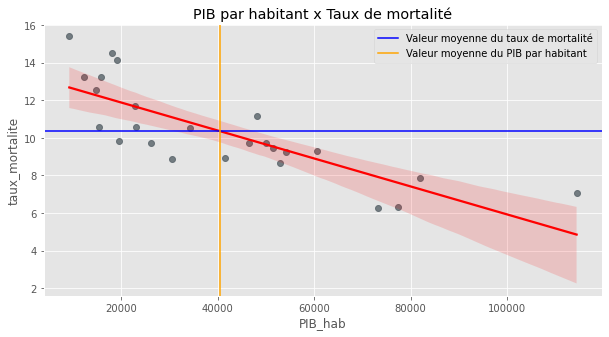

In [126]:
## Nuages de points & Régressions linéaires

## PIB par habitant x Taux de mortalité

plt.figure(figsize=(10,5))

sns.regplot(x=df_agg.PIB_hab,y=df_agg.taux_mortalite,
            scatter_kws={"color": "#576268"}, line_kws={"color": "red"})
plt.axhline(df_agg.taux_mortalite.mean(), color ="blue", label ="Valeur moyenne du taux de mortalité")
plt.axvline(df_agg.PIB_hab.mean(), color ="orange", label ="Valeur moyenne du PIB par habitant")

plt.title("PIB par habitant x Taux de mortalité")
plt.legend()

print(scipy.stats.linregress(df_agg.PIB_hab,df_agg.taux_mortalite)) # regression linéaire

LinregressResult(slope=2.8425435013281798e-05, intercept=9.118897736415516, rvalue=0.5234942187429116, pvalue=0.007241410082789749, stderr=9.646856185730783e-06, intercept_stderr=0.46373362892771386)


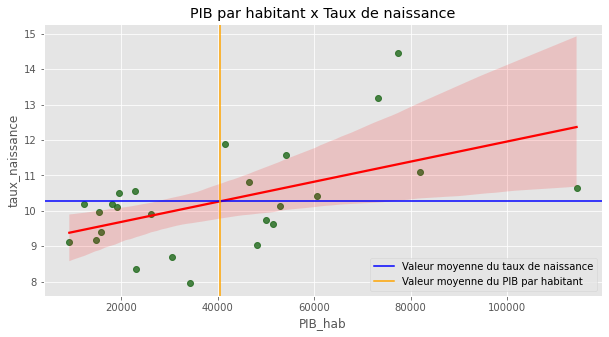

In [127]:
## Pourcentage de croyants x Taux de naissance

plt.figure(figsize=(10,5))

sns.regplot(x=df_agg.PIB_hab,y=df_agg.taux_naissance,
            scatter_kws={"color": "#1E6819"}, line_kws={"color": "red"})
plt.axhline(df_agg.taux_naissance.mean(), color ="blue", label ="Valeur moyenne du taux de naissance")
plt.axvline(df_agg.PIB_hab.mean(), color ="orange", label ="Valeur moyenne du PIB par habitant")

plt.title("PIB par habitant x Taux de naissance")
plt.legend()

print(scipy.stats.linregress(df_agg.PIB_hab,df_agg.taux_naissance)) # regression linéaire

LinregressResult(slope=-1.251958544285748, intercept=2.552115999503444, rvalue=-0.436743309380706, pvalue=0.029044787644759786, stderr=0.537703101015247, intercept_stderr=0.27037645356687817)


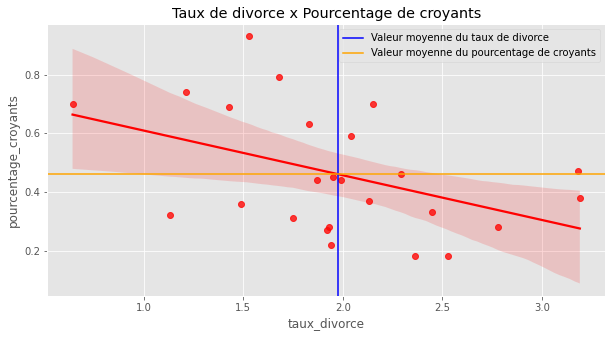

In [128]:
df_agg = df_agg.rename(columns={df_agg.columns[16]: "pourcentage_croyants"}) # renommage d'un nom de colonne

## Pourcentage de croyants x Taux de divorce
plt.figure(figsize=(10,5))

sns.regplot(x=df_agg.taux_divorce,y=df_agg.pourcentage_croyants,
            scatter_kws={"color": "#FF0906"}, line_kws={"color": "red"})
plt.axvline(df_agg.taux_divorce.mean(), color ="blue", label ="Valeur moyenne du taux de divorce")
plt.axhline(df_agg.pourcentage_croyants.mean(), color ="orange", label ="Valeur moyenne du pourcentage de croyants")

plt.title("Taux de divorce x Pourcentage de croyants")
plt.legend()

print(scipy.stats.linregress(df_agg.pourcentage_croyants,df_agg.taux_divorce)) # regression linéaire

LinregressResult(slope=-10.56653011377171, intercept=6.961459035809067, rvalue=-0.32594859326315645, pvalue=0.11181596571418323, stderr=6.390417303990761, intercept_stderr=3.2133316028922048)


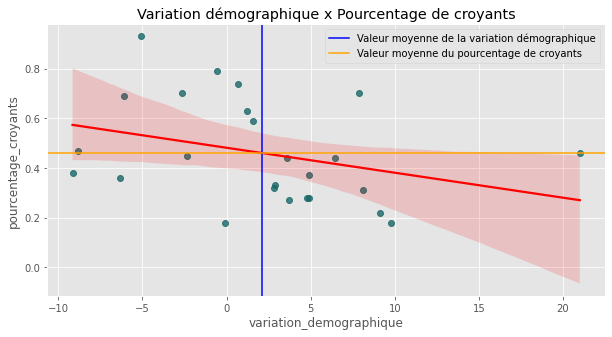

In [129]:
## Pourcentage de croyants x Variation démographique
plt.figure(figsize=(10,5))

sns.regplot(x=df_agg.variation_demographique,y=df_agg.pourcentage_croyants,
            scatter_kws={"color": "#196768"}, line_kws={"color": "red"})
plt.axvline(df_agg.variation_demographique.mean(), color ="blue", label ="Valeur moyenne de la variation démographique")
plt.axhline(df_agg.pourcentage_croyants.mean(), color ="orange", label ="Valeur moyenne du pourcentage de croyants")

plt.title("Variation démographique x Pourcentage de croyants")
plt.legend()

print(scipy.stats.linregress(df_agg.pourcentage_croyants,df_agg.variation_demographique)) # regression linéaire